<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 12** | Exercício 3

Aluna [Lays Félix](https://www.linkedin.com/in/laysfelixbusiness)<br>
Data: 22 de junho de 2024

---

# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from seaborn import load_dataset

In [60]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [61]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [62]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [63]:
# remova as variáveis não significantes

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  net_bill
          0            1             1               1     15.98
          1            0             1               1      8.68
          1            0             1               1     17.51
          1            0             1               1     20.37
          0            1             1               1     20.98
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           5.02e-23
Time:                        23:55:33   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

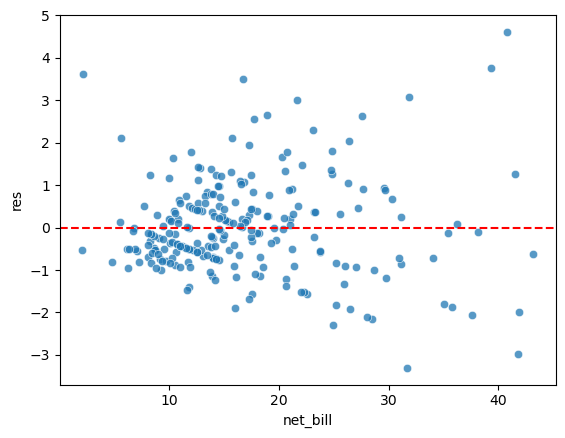

In [69]:
# observe o gráfico de resíduos em função de net_bill

reg1 = smf.ols(formula='tip ~ net_bill', data=tips).fit()
print(reg.summary())

tips['res'] = reg1.resid

sns.scatterplot(x='net_bill', y='res', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           5.02e-23
Time:                        23:56:52   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

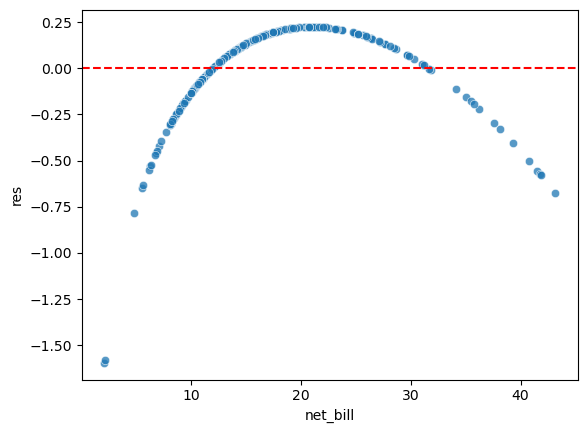

In [70]:
# teste transformar net_bill no log e um polinômio.

reg2 = smf.ols(formula='np.log(net_bill) ~ np.power(net_bill,2)', data=tips).fit()
print(reg.summary())

tips['res'] = reg2.resid

sns.scatterplot(x='net_bill', y='res', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

In [ ]:
# Escolha o melhor modelo

In [72]:
print('1º modelo R-squared:', reg1.rsquared)
print('2º modelo R-squared:', reg2.rsquared)

1º modelo R-squared: 0.3325407312323705
2º modelo R-squared: 0.7092766984961713


O 2º modelo é o melhor porque o R² (70%) é maior que o 1º modelo (33%).

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [75]:
# Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ sex + smoker + time + net_bill', 
                       data=tips)

modelo2 = sm.OLS(y, X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.21e-18
Time:                        00:04:29   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Remova as variáveis não significantes
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ net_bill', 
                       data=tips)

modelo2 = sm.OLS(y, X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           2.60e-21
Time:                        00:04:36   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

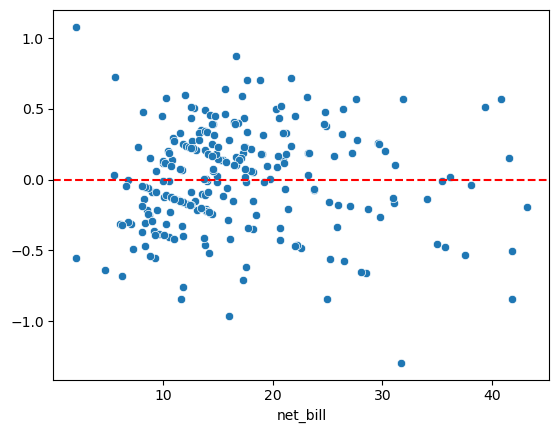

In [77]:
# Observe o gráfico de resíduos em função de net_bill
sns.scatterplot(x='net_bill', 
                y=modelo2.resid, 
                data=tips)
plt.axhline(y=0, 
            color='r', 
            linestyle='--')

plt.show()

In [78]:
# Teste transformar net_bill no log e um polinômio. 
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ np.log(net_bill)', 
                       data=tips)

modelo2_log = sm.OLS(y, X).fit()
modelo2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           5.62e-22
Time:                        00:06:12   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ net_bill + np.power(net_bill,2)', 
                       data=tips)

modelo2_pow = sm.OLS(y, X).fit()
modelo2_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           2.82e-22
Time:                        00:07:31   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Escolha o melhor modelo

In [80]:
print('modelo2_log R-squared:', modelo2_log.rsquared)
print('modelo2_pow R-squared:', modelo2_pow.rsquared)

modelo2_log R-squared: 0.3191910159472313
modelo2_pow R-squared: 0.337524395160816


O modelo_sm2_pow teve o melhor resultado com 34% em comparação com o 1º modelo (modelo2_log) que teve 32% de coeficiente de determinação.

In [81]:
# Do modelo final deste item, calcule o  𝑅2 na escala de tip (sem o log). Compare com o modelo do item 1. 
# Qual tem melhor coeficiente de determinação?

tips['pred_tip_log'] = np.exp(modelo2_log.fittedvalues)

print('`modelo2_log` R-squared:',
      tips[['pred_tip_log', 'tip']].corr().iloc[0,1]**2)

tips['pred_tip_pow'] = np.exp(modelo2_pow.fittedvalues)
print('`modelo2_pow` R-squared:',
      tips[['pred_tip_pow', 'tip']].corr().iloc[0,1]**2)

`modelo2_log` R-squared: 0.3283774385527559
`modelo2_pow` R-squared: 0.32908491114682054


O modelo 'modelo2_pow' continuou com melhor resultado (32,90%) em vista do modelo 'modelo2_log' que teve 32,83% de coeficiente de determinação.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [ ]:
# Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável 
# explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [31]:
# lendo arquivo CSV
renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [32]:
# excluindo variáveis desnecessárias
renda.drop(columns=['Unnamed: 0', 'id_cliente', 'tipo_renda','tipo_residencia'], inplace=True)
renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,educacao,estado_civil,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Secundário,Solteiro,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Superior completo,Casado,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Superior completo,Casado,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Superior completo,Casado,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Secundário,Solteiro,33,4.293151,1.0,6475.97


In [ ]:
# y = renda
# x = tempo_emprego

In [35]:
# modelo de regressão linear simples para explicar renda como variável resposta por tempo_emprego como variável explicativa
reg_renda = smf.ols(formula='renda ~ tempo_emprego', data=renda).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sat, 22 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:47:20   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

In [84]:
# log em y
reg_renda_2 = smf.ols('np.log(renda) ~ tempo_emprego', data=renda).fit()
renda['reg_renda_2'] = reg_renda_2.resid
reg_renda_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:36:42   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
print(f"O R² do segundo modelo aumentou, porém, o 'coef' e 'std err' se aproximaram de 0.")
print(f"R² do Modelo 1: {reg_renda.rsquared*100:.2f}%")
print(f"R² do Modelo 2: {reg_renda_2.rsquared*100:.2f}%")

O R² do segundo modelo diminuiu, porém, o 'coef' e 'std err' se aproximaram de 0.
R² do Modelo 1: 14.82%
R² do Modelo 2: 17.11%


In [87]:
# Ajuste um modelo de regressão linear múltipla p/ explicar renda (ou uma transformação de renda) 
# de acordo com as demais variáveis.

In [88]:
reg_mult_renda = smf.ols('renda ~ tempo_emprego + idade + estado_civil + qtd_filhos + sexo', data = renda).fit()
reg_mult_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     523.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:46:19   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12418   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1968.0873    360.315     -5.462      0.000   -2674.361   -1261.813
estado_civil[T.Separado]  -114.1328    296.357     -0.385      0.700    -695.039     466.773
estado_civil[T.Solteiro]  -389.6870    216.295     -1.802      0.072    -813.658      34.284
estado_civil[T.União]     -484.0210    267.116     -1.812      0.070   -1007.610      39.568
estado_civil[T.Viúvo]     -290.2822    443.336     -0.655      0.513   -1159.289     578.725
sexo[T.M]                 5985.5492    147.298     40.636      0.000    5696.821    6274.277
tempo_emprego              549.4772     10.916     50.337      0.000     528.080     570.874
idade                       41.5354      8.274      5.020      0.000      25.317      57.754
qtd_filhos                 137.4054     92.611      1.484      0.138     -44.127     318.938
==============================================================================
Omnibus:                    17491.782   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9618936.401
Skew:                           8.062   Prob(JB):                         0.00
Kurtosis:                     138.340   Cond. No.                         275.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [90]:
reg_mult_renda = smf.ols('renda ~ tempo_emprego + idade + estado_civil', data = renda).fit()
reg_mult_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     372.4
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:46:28   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12420   BIC:                         2.593e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2248.1108    336.324      6.684      0.000    1588.864    2907.358
estado_civil[T.Separado] -1132.6210    314.357     -3.603      0.000   -1748.809    -516.433
estado_civil[T.Solteiro] -1011.0802    226.344     -4.467      0.000   -1454.749    -567.412
estado_civil[T.União]    -1222.7458    283.440     -4.314      0.000   -1778.331    -667.160
estado_civil[T.Viúvo]    -2306.8029    468.725     -4.921      0.000   -3225.576   -1388.030
tempo_emprego              509.1299     11.564     44.028      0.000     486.463     531.797
idade                        6.8977      8.422      0.819      0.413      -9.612      23.407
==============================================================================
Omnibus:                    17004.607   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7658167.679
Skew:                           7.695   Prob(JB):                         0.00
Kurtosis:                     123.637   Cond. No.                         274.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
reg_mult_renda2 = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + np.power(idade, 2) + tempo_emprego',data=renda).fit()
renda['reg_mult_renda2'] = reg_mult_renda2.resid
reg_mult_renda2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1315.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:50:45   Log-Likelihood:                -13677.
No. Observations:               12427   AIC:                         2.737e+04
Df Residuals:                   12421   BIC:                         2.741e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.3431      0.020    366.593      0.000       7.304       7.382
sexo[T.M]                    0.7691      0.015     52.828      0.000       0.741       0.798
posse_de_veiculo[T.True]     0.0585      0.014      4.153      0.000       0.031       0.086
posse_de_imovel[T.True]      0.0882      0.014      6.394      0.000       0.061       0.115
np.power(idade, 2)        5.099e-05   8.78e-06      5.804      0.000    3.38e-05    6.82e-05
tempo_emprego                0.0611      0.001     59.359      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.211
Skew:                           0.022   Prob(JB):                        0.546
Kurtosis:                       3.020   Cond. No.                     6.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [93]:
print(f"R² do Modelo 1: {reg_mult_renda.rsquared*100:.2f}%")
print(f"R² do Modelo 2: {reg_mult_renda2.rsquared*100:.2f}%")

R² do Modelo 1: 15.25%
R² do Modelo 2: 34.61%


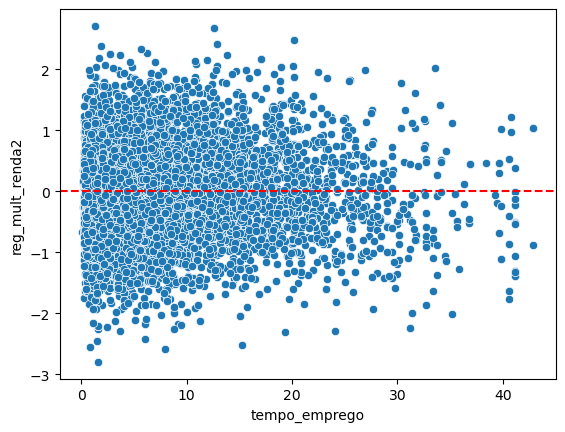

In [94]:
sns.scatterplot(x = 'tempo_emprego', y = 'reg_mult_renda2', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

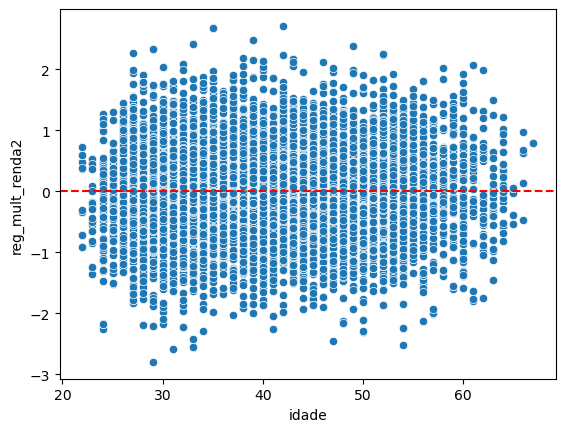

In [96]:
sns.scatterplot(x = 'idade', y = 'reg_mult_renda2', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

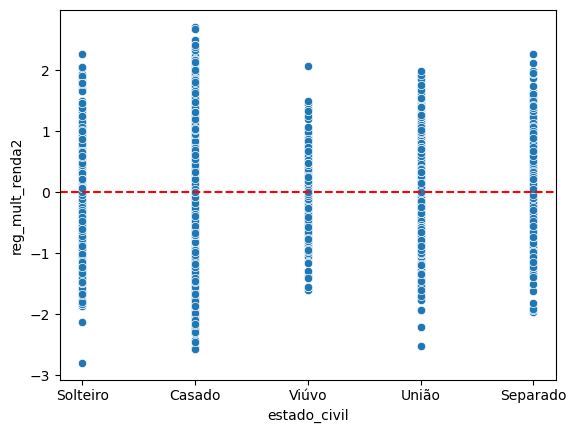

In [97]:
sns.scatterplot(x = 'estado_civil', y = 'reg_mult_renda2', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

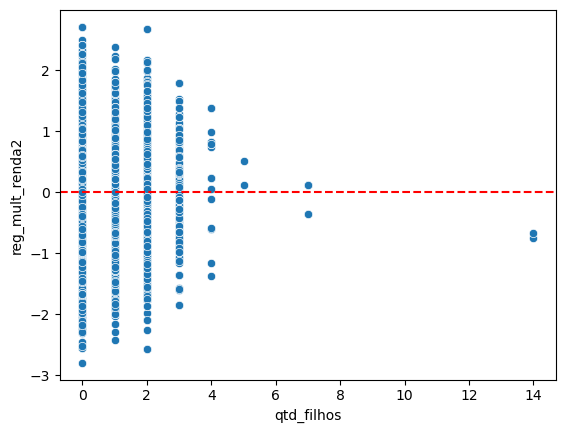

In [98]:
sns.scatterplot(x = 'qtd_filhos', y = 'reg_mult_renda2', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

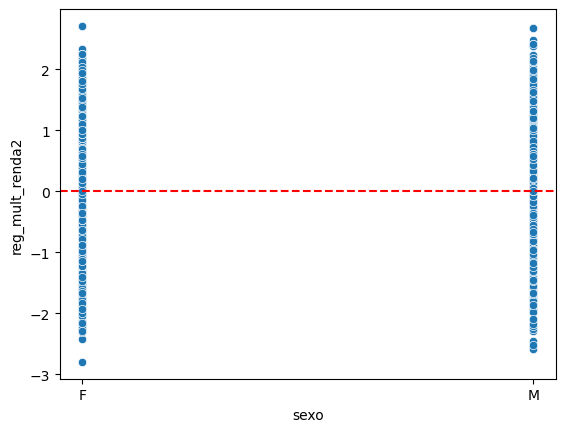

In [99]:
sns.scatterplot(x = 'sexo', y = 'reg_mult_renda2', data = renda)
plt.axhline(y=0, color='r', linestyle='--')